<a href="https://colab.research.google.com/github/hexpert/Equlibrum/blob/main/224329011_ahmet_muratoglu_yzm507_final_projesi_nsn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1DzWgQ9iA0WwYhn0-KOBkWaIy1v-3ADdb?usp=sharing

224329011 Ahmet Muratoğlu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import math  # math modülünü içe aktar
import numpy as np
from skimage import io, filters, measure, color
from scipy import ndimage

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from skimage import io, filters, morphology, measure, color
from skimage.feature import canny
from google.colab.patches import cv2_imshow # cv2_imshow'u içe aktar
from skimage import io, measure, color, restoration, exposure, segmentation, feature
from skimage.filters import gaussian, threshold_multiotsu
from skimage.morphology import disk, closing
from skimage.segmentation import clear_border, watershed
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.measure import find_contours, regionprops
from skimage.filters import gaussian, threshold_otsu, threshold_multiotsu

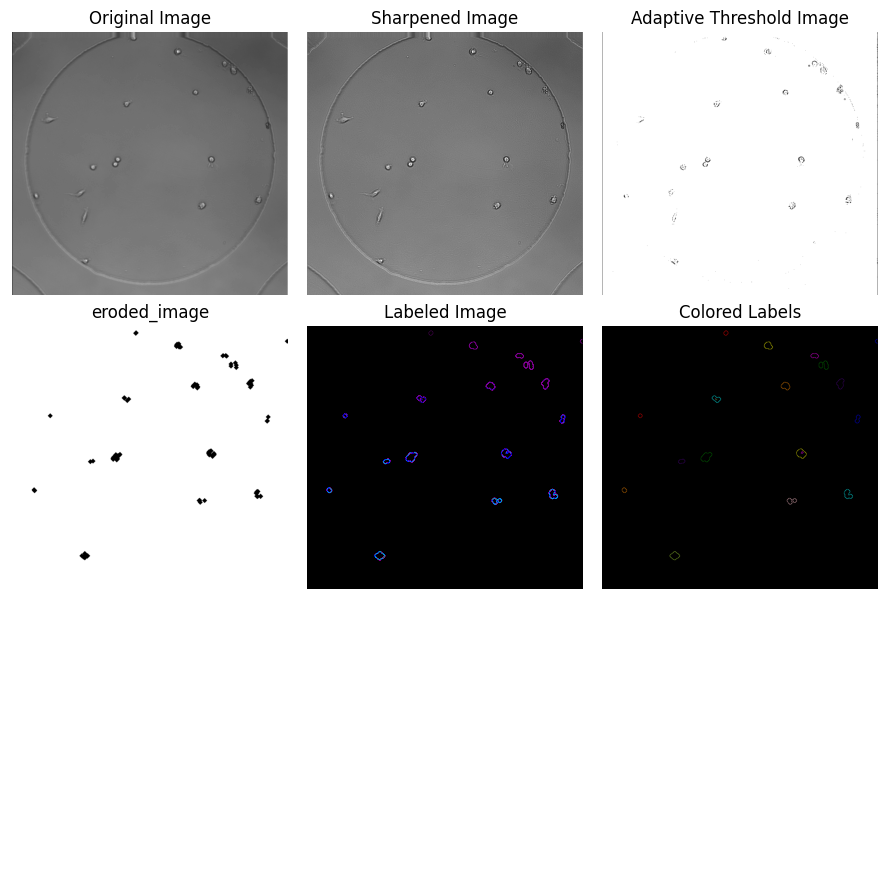

<Figure size 640x480 with 0 Axes>

Label: 1, Area: 843248, Orientation: 1.53, Circularity: 0.37, Compactness: 157.90
Label: 2, Area: 1, Orientation: 0.79, Circularity: 0.00, Compactness: 0.00


[{'label': 1,
  'area': 843248,
  'orientation': 1.5286777329707952,
  'circularity': 0.3715694503940652,
  'compactness': 157.90385322033725},
 {'label': 2,
  'area': 1,
  'orientation': 0.7853981633974483,
  'circularity': 0,
  'compactness': 0}]

In [ ]:
# Görüntüyü yükle
image_path = '/content/drive/MyDrive/YZM507/cell_image_input.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 3x3 kernel ile üç düşük gürültü düşük Keskinleştirme filtresi uyguladım daha büyükleri keskinliği artırdı fakat gürültüde arttı
kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_image = cv2.filter2D(image, -1, kernel_sharpening)

# Görüntü üzerinde adaptif eşikleme uygula
# Burada cv2.ADAPTIVE_THRESH_GAUSSIAN_C adaptif yöntemini ve THRESH_BINARY_INV eşikleme türünü kullanıyoruz.
# Blok boyutu olarak 11 ve C değeri olarak 2 seçildi. Bu değerler genel olarak iyi sonuçlar verir fakat görüntüye göre değiştirilebilir.
#thresholded_img = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
thresholded_img = cv2.adaptiveThreshold(sharpened_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 49)
#thresholded_img = cv2.adaptiveThreshold(image, 178, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.TRESH_BINARY_INV, 21,6)

# Morfolojik işlemler için yapılandırma elementini denemeler sonucu 3x3 (kernele) karara verdim
kernel_size = (3, 3)
morph_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)

# Morfolojik işlemler uygulanıyor

# Morfolojik dilasyon,kapama,erozyon
dilated_image = cv2.dilate(thresholded_img, morph_kernel, iterations=0)
closed_image = cv2.morphologyEx(dilated_image, cv2.MORPH_CLOSE, morph_kernel, iterations=1)
eroded_image = cv2.erode(closed_image, morph_kernel, iterations=7)

labeled_image, num_features = measure.label(eroded_image, return_num=True, connectivity=2, background=0)
colored_labels = color.label2rgb(labeled_image, bg_label=0)
regions = measure.regionprops(labeled_image)
# Her bir bölge için özellikleri elde et
regions = measure.regionprops(labeled_image)

# Bölge özelliklerini saklamak için listeleri yeniden başlat
properties = []
for region in regions:
    # Özellik hesaplamaları
    if region.perimeter == 0:
        circularity = 0
        compactness = 0
    else:
        circularity = (4 * np.pi * region.area) / (region.perimeter ** 2)
        compactness = region.area / region.perimeter

    properties.append({
        'label': region.label,  # Bölgenin etiketini ekleyin
        'area': region.area,
        'orientation': region.orientation,
        'circularity': circularity,
        'compactness': compactness
    })

# Canny kenar algılama uygula
edges_canny = canny(eroded_image , sigma=2)
#etiketleme - bağlı bileşen, renklendirme
labeled_image, num_features = measure.label(edges_canny , return_num=True, connectivity=2, background=0)
colored_labels = color.label2rgb(labeled_image, bg_label=0)
regions = measure.regionprops(labeled_image)

# Sonuçları her adımdan sonra göster
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(sharpened_image, cmap='gray')
ax[1].set_title('Sharpened Image')

ax[2].imshow(thresholded_img, cmap='gray')
ax[2].set_title('Adaptive Threshold Image')

ax[3].imshow(eroded_image, cmap='gray')
ax[3].set_title('eroded_image')

ax[4].imshow(labeled_image, cmap='nipy_spectral')
ax[4].set_title('Labeled Image')

ax[5].imshow(colored_labels)
ax[5].set_title('Colored Labels')

#ax[6].imshow(edges_canny, cmap='gray')
#ax[6].set_title('Canny Edges')

# Tüm alt grafikler için eksenleri kapat
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

# İlk 5 bileşenin özelliklerini yazdırma (örnek olarak)
for prop in properties[:5]:
    print(f"Label: {prop['label']}, Area: {prop['area']}, Orientation: {prop['orientation']:.2f}, "
          f"Circularity: {prop['circularity']:.2f}, Compactness: {prop['compactness']:.2f}")

# Bu özellikler daha sonra analiz için kullanılabilir ve tüm özelliklerin listesi döndürülebilir.
properties[:5]  # Örnek olarak ilk 5 özelliği döndürüyoruz.


Burası diğer denemeler için

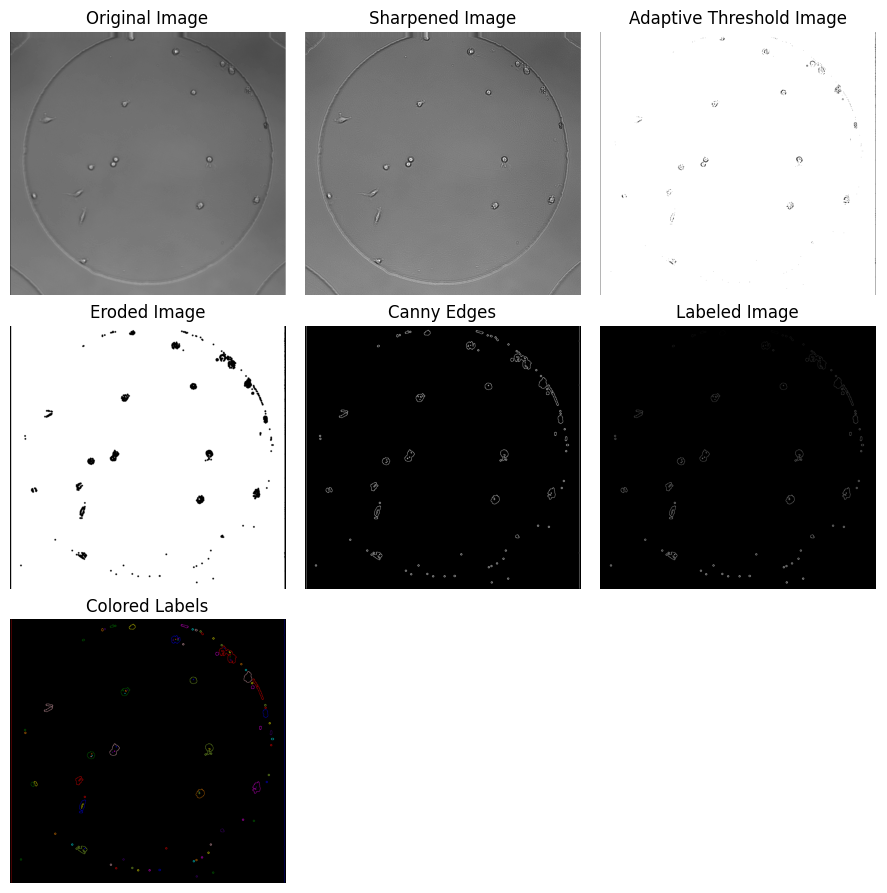

In [ ]:
# Görüntüyü yükle
image_path = '/content/drive/MyDrive/YZM507/cell_image_input.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Keskinleştirme uygula
kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_image = cv2.filter2D(image, -1, kernel_sharpening)

# Görüntü üzerinde adaptif eşikleme uygula
thresholded_img = cv2.adaptiveThreshold(sharpened_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 49)
#thresholded_img = cv2.adaptiveThreshold(sharpened_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)

# Morfolojik erozyon uygula
eroded_image = morphology.erosion(thresholded_img, morphology.disk(3))

# Bağlı bileşen etiketleme ve özellikleri hesaplama işlemlerini uygula
labeled_image, num_features = measure.label(eroded_image, return_num=True, connectivity=2, background=0)
colored_labels = color.label2rgb(labeled_image, bg_label=0)
regions = measure.regionprops(labeled_image)

# Bölge özelliklerini saklamak için listeleri yeniden başlat
properties = []
for region in regions:
    if region.perimeter == 0:
        circularity = 0
        compactness = 0
    else:
        circularity = (4 * np.pi * region.area) / (region.perimeter ** 2)
        compactness = region.area / region.perimeter

    properties.append({
        'area': region.area,
        'orientation': region.orientation,
        'circularity': circularity,
        'compactness': compactness
    })

# Canny kenar algılama uygula
edges_canny = canny(eroded_image, sigma=1)
labeled_image, num_features = measure.label(edges_canny, return_num=True, connectivity=2, background=0)
colored_labels = color.label2rgb(labeled_image, bg_label=0)
regions = measure.regionprops(labeled_image)
# Sonuçları her adımdan sonra göster
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(sharpened_image, cmap='gray')
ax[1].set_title('Sharpened Image')

ax[2].imshow(thresholded_img, cmap='gray')
ax[2].set_title('Adaptive Threshold Image')

ax[3].imshow(eroded_image, cmap='gray')
ax[3].set_title('Eroded Image')

ax[4].imshow(edges_canny, cmap='gray')
ax[4].set_title('Canny Edges')

ax[5].imshow(labeled_image, cmap='gray')
ax[5].set_title('Labeled Image')

ax[6].imshow(colored_labels)
ax[6].set_title('Colored Labels')

# Tüm alt grafikler için eksenleri kapat
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# Her bölgenin özellikleri
#properties = []


denemeler denemeler

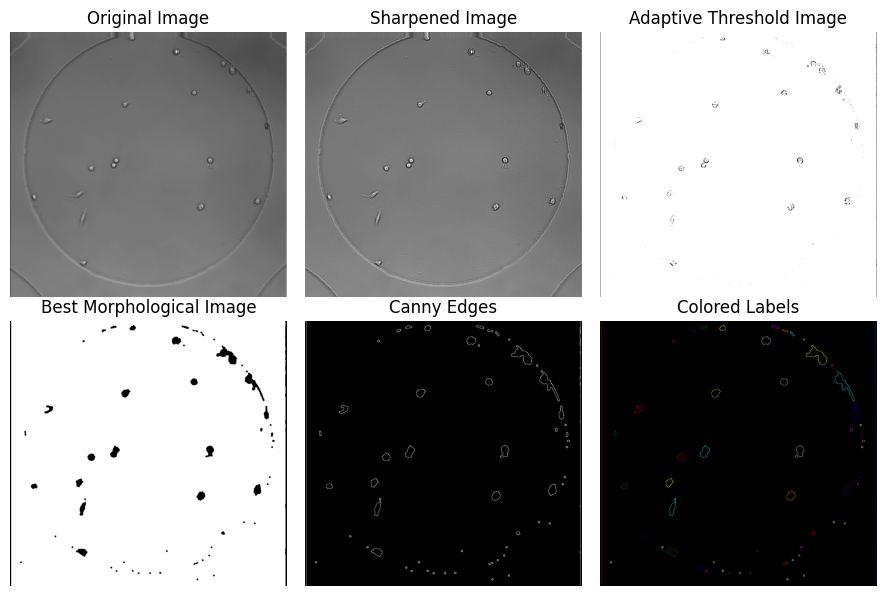

[{'area': 828770,
  'orientation': 1.466532334124642,
  'circularity': 0.2051977004245104,
  'compactness': 116.33176671932677}]

In [ ]:
# Görüntüyü yükle
image_path = '/content/drive/MyDrive/YZM507/cell_image_input.png'  # Görüntü yolunu güncelleyin
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Keskinleştirme uygula
kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_image = cv2.filter2D(image, -1, kernel_sharpening)

# Görüntü üzerinde adaptif eşikleme uygula
thresholded_img = cv2.adaptiveThreshold(sharpened_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 49)

# Morfolojik erozyon uygula
eroded_image = morphology.erosion(thresholded_img, morphology.disk(3))

# Morfolojik işlemleri farklı yapılandırma elementleri ve boyutları kullanarak uygula
def apply_morphology(image, element_type, kernel_size):
    if element_type == 'rectangle':
        element = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    elif element_type == 'ellipse':
        element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    elif element_type == 'cross':
        element = cv2.getStructuringElement(cv2.MORPH_CROSS, (kernel_size, kernel_size))
    else:
        raise ValueError("Unsupported element type")

    return morphology.opening(image, element)

# Morfolojik işlemleri farklı yapılandırma elementleri ve boyutları kullanarak uygula ve en iyi sonucu seç
element_types = ['rectangle', 'ellipse', 'cross']
sizes = [3,5,7] #kernel size
best_morph_img = None
best_score = -1  # En iyi skoru saklamak için

# Değerlendirme için ölçüt burada belirlenmelidir, örneğin 'bileşen sayısı', 'çevre uzunluğu' vs.
# Bu örnekte, en az bileşen sayısını temel alıyorum.
for element_type in element_types:
    for size in sizes:
        morph_img = apply_morphology(eroded_image, element_type, size)
        labeled_img, num_features = measure.label(morph_img, return_num=True, connectivity=2, background=0)

        if num_features < best_score or best_score == -1:
            best_morph_img = morph_img
            best_score = num_features

# Bağlı bileşen etiketleme ve özellikleri hesaplama işlemlerini uygula
labeled_image, num_features = measure.label(best_morph_img, return_num=True, connectivity=2, background=0)
colored_labels = color.label2rgb(labeled_image, bg_label=0)
regions = measure.regionprops(labeled_image)

# Bölge özelliklerini saklamak için listeleri yeniden başlat
properties = []
for region in regions:
    if region.perimeter == 0:
        circularity = 0
        compactness = 0
    else:
        circularity = (4 * np.pi * region.area) / (region.perimeter ** 2)
        compactness = region.area / region.perimeter

    properties.append({
        'area': region.area,
        'orientation': region.orientation,
        'circularity': circularity,
        'compactness': compactness
    })

# Canny kenar algılama uygula
edges_canny = canny(best_morph_img, sigma=1)
labeled_image, num_features = measure.label(edges_canny, return_num=True, connectivity=2, background=0)
colored_labels = color.label2rgb(labeled_image, bg_label=0)
regions = measure.regionprops(labeled_image)
# Sonuçları her adımdan sonra göster
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(sharpened_image, cmap='gray')
ax[1].set_title('Sharpened Image')

ax[2].imshow(thresholded_img, cmap='gray')
ax[2].set_title('Adaptive Threshold Image')

ax[3].imshow(best_morph_img, cmap='gray')
ax[3].set_title('Best Morphological Image')

ax[4].imshow(edges_canny, cmap='gray')
ax[4].set_title('Canny Edges')

ax[5].imshow(colored_labels)
ax[5].set_title('Colored Labels')

# Tüm alt grafikler için eksenleri kapat
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# Her bölgenin özelliklerini daha fazla analiz için döndür
properties


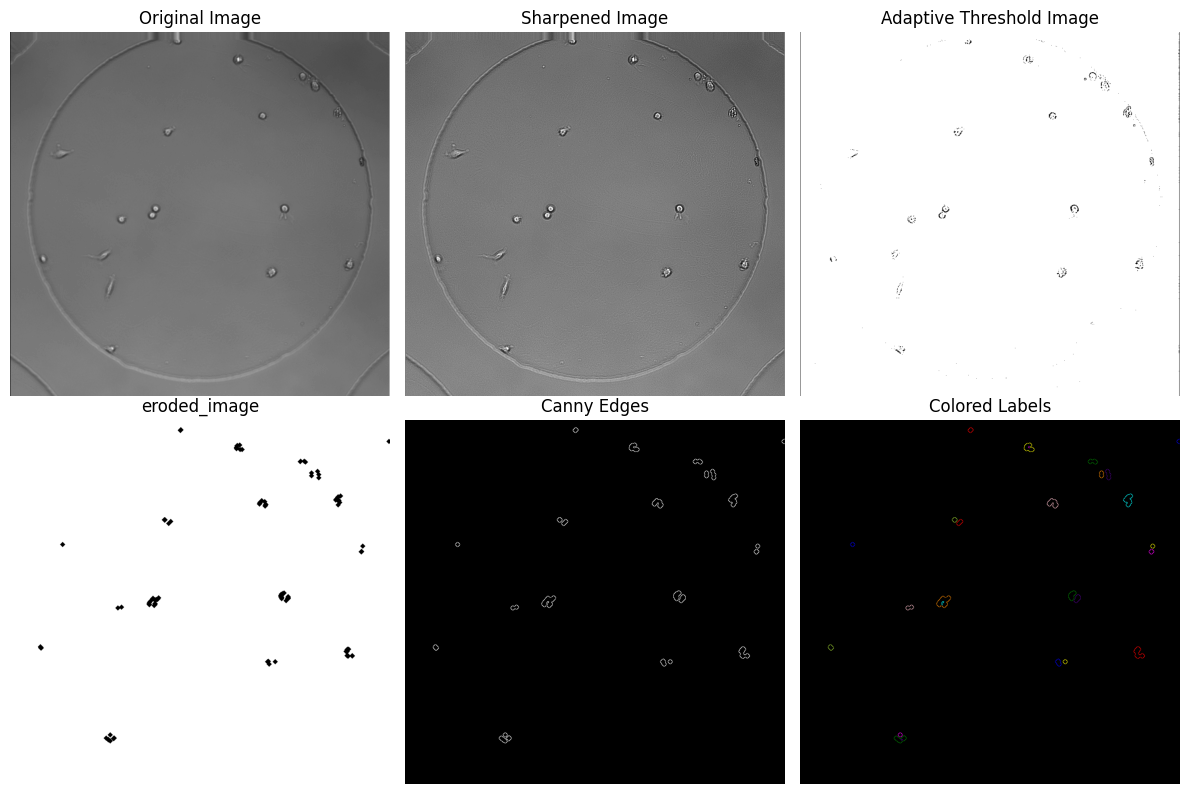

In [ ]:
# Görüntüyü yükle
image_path = '/content/drive/MyDrive/YZM507/cell_image_input.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Keskinleştirme çekirdeği oluştur ve uygula
kernel_sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(image, -1, kernel_sharpening)

# Adaptif eşikleme uygula
adaptive_thresh_image = cv2.adaptiveThreshold(sharpened_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 21, 49)

# Morfolojik açma işlemi uygula
kernel = np.ones((3, 3), np.uint8)
#opened_image = cv2.morphologyEx(adaptive_thresh_image, cv2.MORPH_OPEN, kernel, iterations=0)
dilated_image = cv2.dilate(adaptive_thresh_image, morph_kernel, iterations=0)
closed_image = cv2.morphologyEx(dilated_image , cv2.MORPH_CLOSE, morph_kernel, iterations=1)
eroded_image = cv2.erode(closed_image, morph_kernel, iterations=5)

# Bölge özelliklerini saklamak için listeleri yeniden başlat
properties = []
for region in regions:
    if region.perimeter == 0:
        circularity = 0
        compactness = 0
    else:
        circularity = (4 * np.pi * region.area) / (region.perimeter ** 2)
        compactness = region.area / region.perimeter

    properties.append({
        'area': region.area,
        'orientation': region.orientation,
        'circularity': circularity,
        'compactness': compactness
    })

# Canny kenar algılama uygula
edges_canny = canny(eroded_image, sigma=1)
# Bağlı bileşen etiketleme ve özellikleri hesaplama işlemlerini uygula
labeled_image, num_features = measure.label(edges_canny, return_num=True, connectivity=2, background=0)
colored_labels = color.label2rgb(labeled_image, bg_label=0)
regions = measure.regionprops(labeled_image)
# Sonuçları her adımdan sonra göster
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(sharpened_image, cmap='gray')
ax[1].set_title('Sharpened Image')

ax[2].imshow(adaptive_thresh_image, cmap='gray')
ax[2].set_title('Adaptive Threshold Image')

ax[3].imshow(eroded_image, cmap='gray')
ax[3].set_title('eroded_image')

ax[4].imshow(edges_canny, cmap='gray')
ax[4].set_title('Canny Edges')

ax[5].imshow(colored_labels)
ax[5].set_title('Colored Labels')


# Tüm alt grafikler için eksenleri kapat
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# Her bölgenin özelliklerini daha fazla analiz için döndür
properties = []


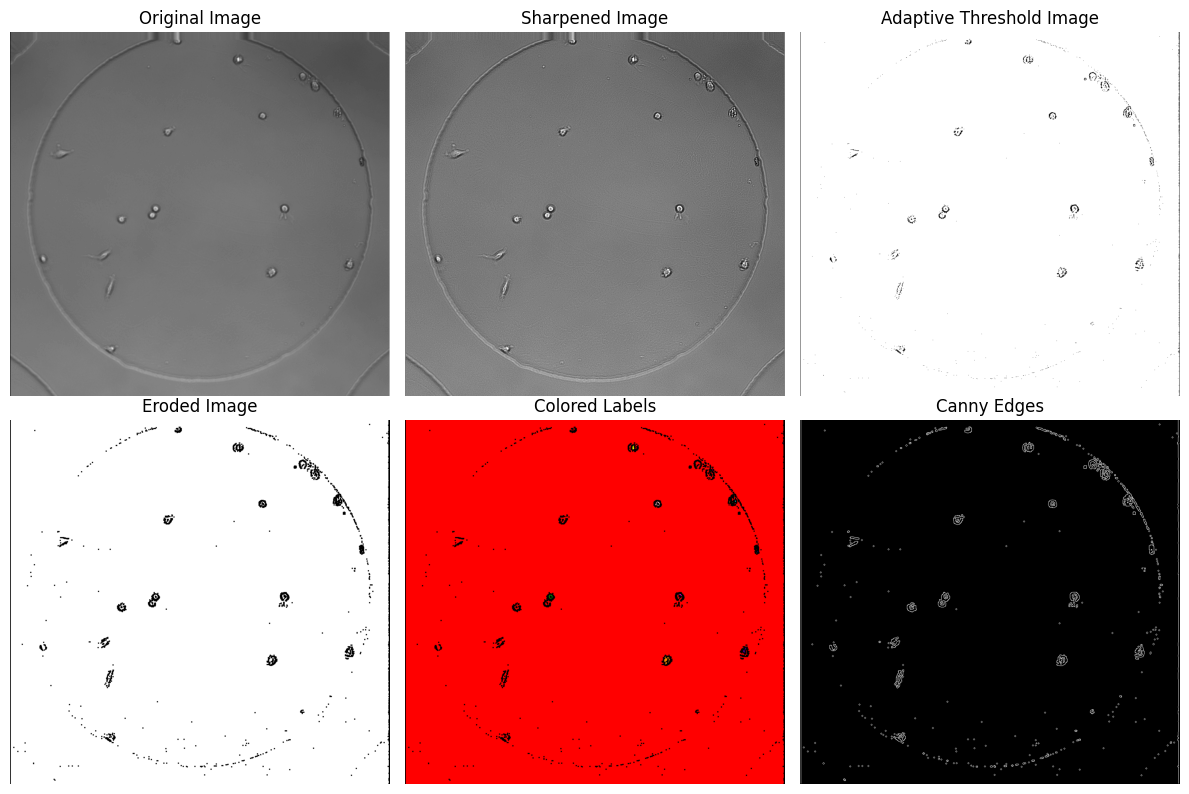

[]

In [ ]:
import cv2
import numpy as np
from skimage import filters, morphology, measure, color
import matplotlib.pyplot as plt

# Yüklenen görüntüyü oku
image_path = '/content/drive/MyDrive/YZM507/cell_image_input.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Uygun bir kernel boyutu kullanarak keskinleştirme işlemi uygula
kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_image = cv2.filter2D(image, -1, kernel_sharpening)

# cv2.ADAPTIVE_THRESH_GAUSSIAN_C yöntemiyle adaptif eşikleme uygula
adaptive_thresh_image = cv2.adaptiveThreshold(sharpened_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                              cv2.THRESH_BINARY, 21, 41)

# Erozyon işlemi uygula
erosion_kernel = np.ones((3, 3), np.uint8)
eroded_image = cv2.erode(adaptive_thresh_image, erosion_kernel, iterations=1)

# Bağlı bileşen etiketleme ve özellikleri hesaplama işlemlerini uygula
labeled_image, num_features = measure.label(eroded_image, return_num=True, connectivity=2, background=0)
colored_labels = color.label2rgb(labeled_image, bg_label=0)
regions = measure.regionprops(labeled_image)

# Canny kenar algılama uygula
#edges_canny = filters.canny(eroded_image, sigma=1)
edges_canny = canny(eroded_image, sigma=1)
# Sonuçları göster
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(sharpened_image, cmap='gray')
ax[1].set_title('Sharpened Image')

ax[2].imshow(adaptive_thresh_image, cmap='gray')
ax[2].set_title('Adaptive Threshold Image')

ax[3].imshow(eroded_image, cmap='gray')
ax[3].set_title('Eroded Image')

ax[4].imshow(colored_labels)
ax[4].set_title('Colored Labels')

ax[5].imshow(edges_canny, cmap='gray')
ax[5].set_title('Canny Edges')

# Tüm alt grafikler için eksenleri kapat
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# Her bölgenin özelliklerini daha fazla analiz için döndür
properties


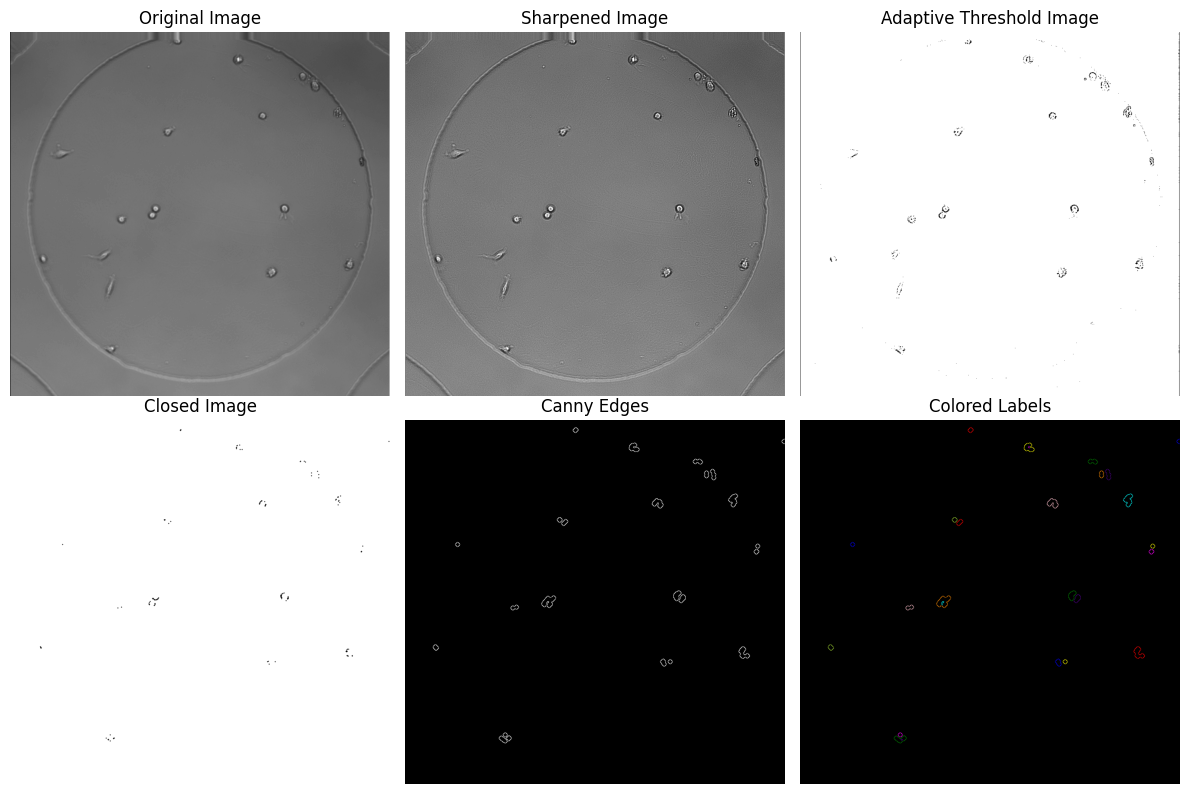

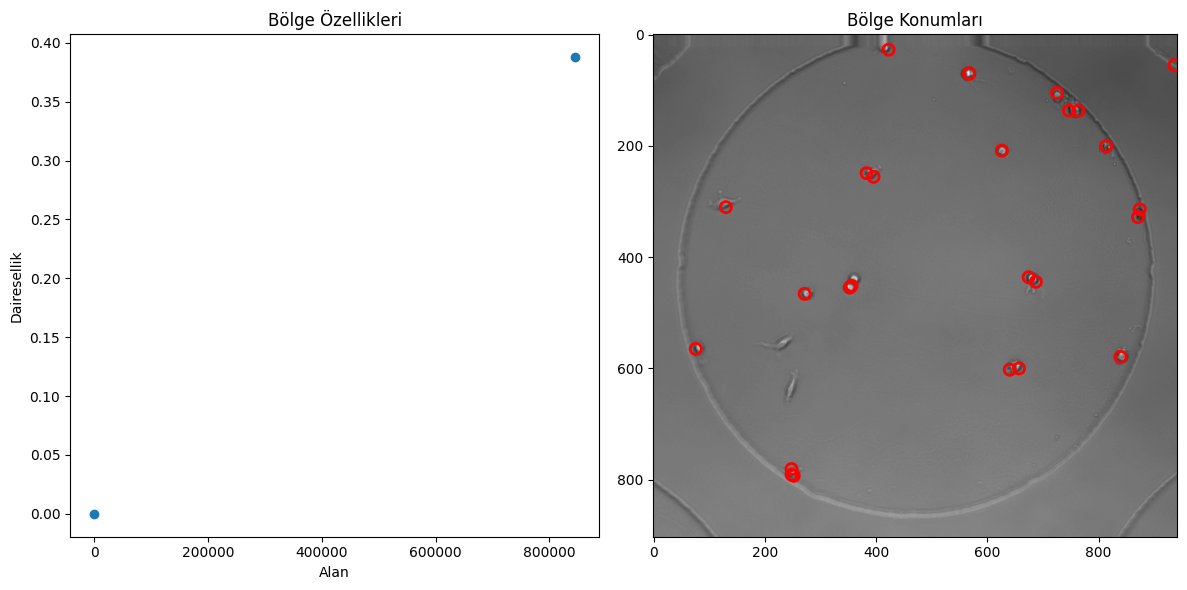

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import measure, color
from skimage.feature import canny

# Görüntüyü yükle
image_path = '/content/drive/MyDrive/YZM507/cell_image_input.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Görüntü yükleme başarısızsa hata ver
if image is None:
    raise ValueError("Görüntü yüklenemedi. Lütfen dosya yolunu kontrol edin.")

# Keskinleştirme uygula
kernel_sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(image, -1, kernel_sharpening)

# Görüntü üzerinde adaptif eşikleme uygula
thresholded_img = cv2.adaptiveThreshold(sharpened_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 49)

# Morfolojik işlemler için yapılandırma elementi (kernel) oluşturuluyor
kernel_size = (3, 3)
morph_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)

# Morfolojik işlemler uygulanıyor
dilated_image = cv2.dilate(thresholded_img, morph_kernel, iterations=0)

# Morfolojik kapatma ve erozyon işlemi
closed_image = cv2.morphologyEx(dilated_image, cv2.MORPH_CLOSE, morph_kernel, iterations=1)
eroded_image = cv2.erode(closed_image, morph_kernel, iterations=5)

# Bağlı bileşen etiketleme ve özellikleri hesaplama
labeled_image, num_features = measure.label(eroded_image, return_num=True, connectivity=2, background=0)
colored_labels = color.label2rgb(labeled_image, bg_label=0)
regions = measure.regionprops(labeled_image)

# Bölge özelliklerini saklamak için liste oluştur
properties = []
for region in regions:
    if region.perimeter == 0:
        circularity = 0
        compactness = 0
    else:
        circularity = (4 * np.pi * region.area) / (region.perimeter ** 2)
        compactness = region.area / region.perimeter

    properties.append({
        'area': region.area,
        'orientation': region.orientation,
        'circularity': circularity,
        'compactness': compactness
    })

# Canny kenar algılama uygula
edges_canny = canny(eroded_image, sigma=1)
labeled_image, num_features = measure.label(edges_canny, return_num=True, connectivity=2, background=0)
colored_labels = color.label2rgb(labeled_image, bg_label=0)
regions = measure.regionprops(labeled_image)
# Sonuçları her adımdan sonra göster
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(sharpened_image, cmap='gray')
ax[1].set_title('Sharpened Image')

ax[2].imshow(thresholded_img, cmap='gray')
ax[2].set_title('Adaptive Threshold Image')

ax[3].imshow(closed_image, cmap='gray')
ax[3].set_title('Closed Image')

ax[4].imshow(edges_canny, cmap='gray')
ax[4].set_title('Canny Edges')

#ax[5].imshow(labeled_image, cmap='gray')
#ax[5].set_title('Labeled Image')

ax[5].imshow(colored_labels)
ax[5].set_title('Colored Labels')

# Tüm alt grafikler için eksenleri kapat
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# Bölge özelliklerini görselleştirme
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bölge özelliklerinin scatter plot'u
areas = [prop['area'] for prop in properties]
circularities = [prop['circularity'] for prop in properties]
ax[0].scatter(areas, circularities)
ax[0].set_title('Bölge Özellikleri')
ax[0].set_xlabel('Alan')
ax[0].set_ylabel('Dairesellik')

# Görüntü üzerinde bölge konumlarını işaretleme
ax[1].imshow(image, cmap='gray')
ax[1].set_title('Bölge Konumları')

for region in regions:
    # Her bölgenin merkezine bir daire çiz
    y, x = region.centroid
    circle = mpatches.Circle((x, y), radius=10, fill=False, edgecolor='red', linewidth=2)
    ax[1].add_patch(circle)

plt.tight_layout()
plt.show()
